# metadata


*   author: juan sebastian suarez corredor
*   date: 18/03/2022



#DATOS DE MERCADEO DE VALORES (Acciones de ELF)

---
elf Cosmetics es una marca estadounidense de cosméticos con sede en Oakland, California. Fue fundada por Joseph Shamah y Scott Vincent Borba en 2004. Los artículos incluyen productos para el cuidado de la piel y el baño, maquillaje a base de minerales, herramientas profesionales, delineadores de ojos, lápiz labial, brillos, rubores, bronceadores, brochas y rímel, entre otros.

Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de Samsung en bolsa de Estados unidos, donde bucaremos :


*   la señal CLOSE (precio de cierre diario) 
*   la señal VOLUME (número de acciones que han cambiado de manos a lo largo de dicho período de tiempo).


https://es-us.finanzas.yahoo.com/


##Importando librerías

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/juansecortez/machinelearning/main/ELF.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-19,28.120001,28.120001,27.400000,27.670000,27.670000,539600
1,2021-03-22,28.889999,29.240000,28.290001,28.350000,28.350000,770500
2,2021-03-23,28.160000,28.315001,27.110001,27.240000,27.240000,558900
3,2021-03-24,27.559999,27.674999,26.030001,26.139999,26.139999,865600
4,2021-03-25,25.850000,26.660000,25.260000,26.650000,26.650000,859600


## conociendo y Preprocesando los datos


In [3]:
#df.describe()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


###Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [4]:
df = df.dropna()
df = df.reset_index(drop=True)

In [5]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


In [6]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [7]:
df_escalado.head()
df_escalado.isnull().sum()

Close     0
Volume    0
2         0
3         0
4         0
5         0
dtype: int64

###Representación gráfica de los datos.

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





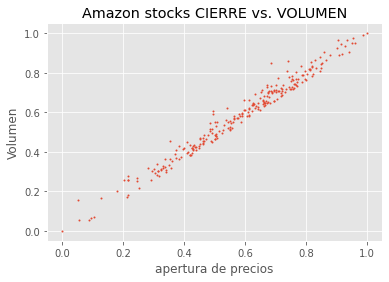

In [8]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title('Amazon stocks CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

##Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

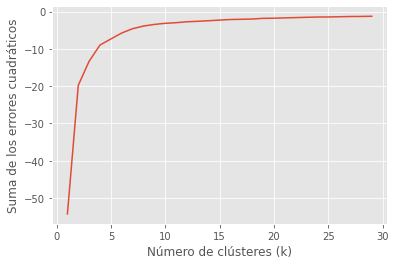

In [9]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [10]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.49577999 0.4958145  0.51486383 0.50188939 0.50188939 0.15720659]
 [0.67772318 0.67935121 0.6910998  0.68060158 0.68060158 0.14945403]
 [0.33653092 0.33218825 0.36164081 0.34716888 0.34716888 0.1219247 ]
 [0.84387451 0.85329425 0.86810952 0.86233744 0.86233744 0.10293213]
 [0.11258471 0.11267674 0.12770522 0.11813813 0.11813813 0.16028959]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [11]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [12]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,label
0,2021-03-19,28.120001,28.120001,27.400000,27.670000,27.670000,539600,0
1,2021-03-22,28.889999,29.240000,28.290001,28.350000,28.350000,770500,0
2,2021-03-23,28.160000,28.315001,27.110001,27.240000,27.240000,558900,0
3,2021-03-24,27.559999,27.674999,26.030001,26.139999,26.139999,865600,2
4,2021-03-25,25.850000,26.660000,25.260000,26.650000,26.650000,859600,2
5,2021-03-26,26.760000,27.389999,26.500000,27.110001,27.110001,692600,2
6,2021-03-29,27.049999,27.660000,26.350000,26.580000,26.580000,571100,2
7,2021-03-30,26.430000,27.100000,26.299999,27.040001,27.040001,360700,2
8,2021-03-31,27.330000,27.440001,26.830000,26.830000,26.830000,447200,2
9,2021-04-01,26.799999,27.160000,26.420000,26.940001,26.940001,388100,2


##Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


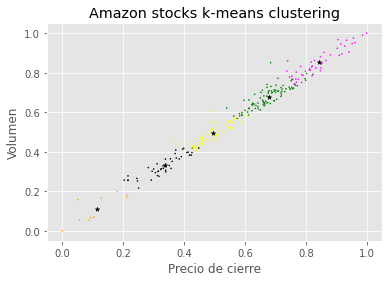

In [13]:
#%% Plot k-means clustering.
colores=['yellow','green','black','fuchsia','orange']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Amazon stocks k-means clustering')
plt.show()

##Clasificación de nuevas muestras.

---
Supongamos que nuestros nuevos datos a categorizar son los siguientes:


*   CLOSE: 100.000
*   VOLUME: 5.500.000






### Agregando datos de forma clasica (paso a paso)

In [14]:
close = 100000
volume = 5500000

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

#### Normalizamos los nuevos datos

In [15]:
#agregamos los datos al dataframe original
df_n = df.append(nuevo_dato)

####borramos columnas que no tenemos

---

Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice

In [16]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


####Aplicamos normalización de datos [0 - 1]

In [17]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [18]:
df_escalado.iloc[-3:]   #ver los ultimos registros

,Close,Volume,2,3,4,5
252,0.215876,0.255973,0.260749,0.000031,0.300384,0.057097
253,0.215876,0.255973,0.260749,0.000031,0.300384,0.054033
254,NaN,NaN,NaN,1.000000,NaN,1.000000
